### Import Modules

In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
from lpp_utils import *
from nilearn import datasets, plotting


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


#### Open the Mask

In [2]:
file = open('../data_lpp/fmri_data/other/all293_masker_pickled.obj', 'rb') 
all293_masker_reopened = pickle.load(file)
file.close()
all293_masker_reopened

NiftiLabelsMasker(detrend=True, high_pass=0.01,
                  labels_img='../data_lpp/fmri_data/other/allcombined.nii',
                  low_pass=0.12, standardize=True, t_r=2.0)

#### Load data, perform basic ISC

Assuming 50 subjects with 282 time points and 293 voxel(s) or ROI(s).



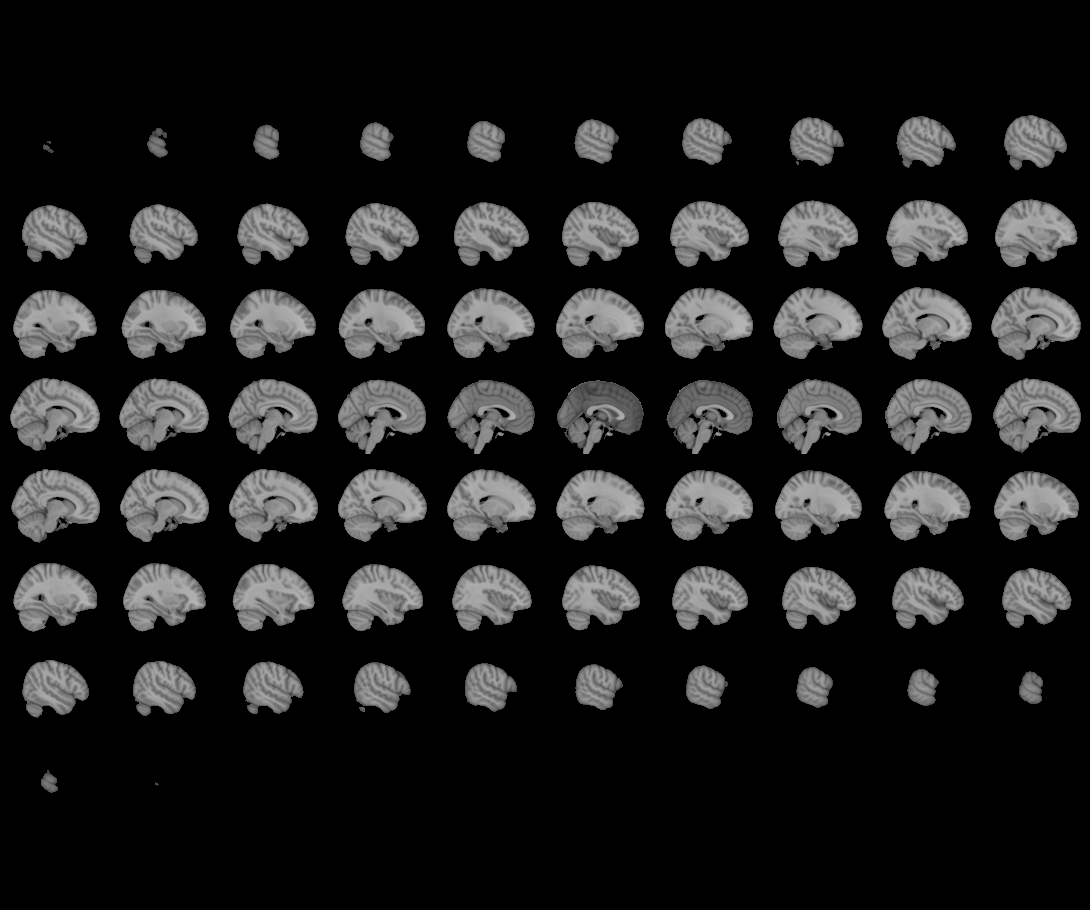
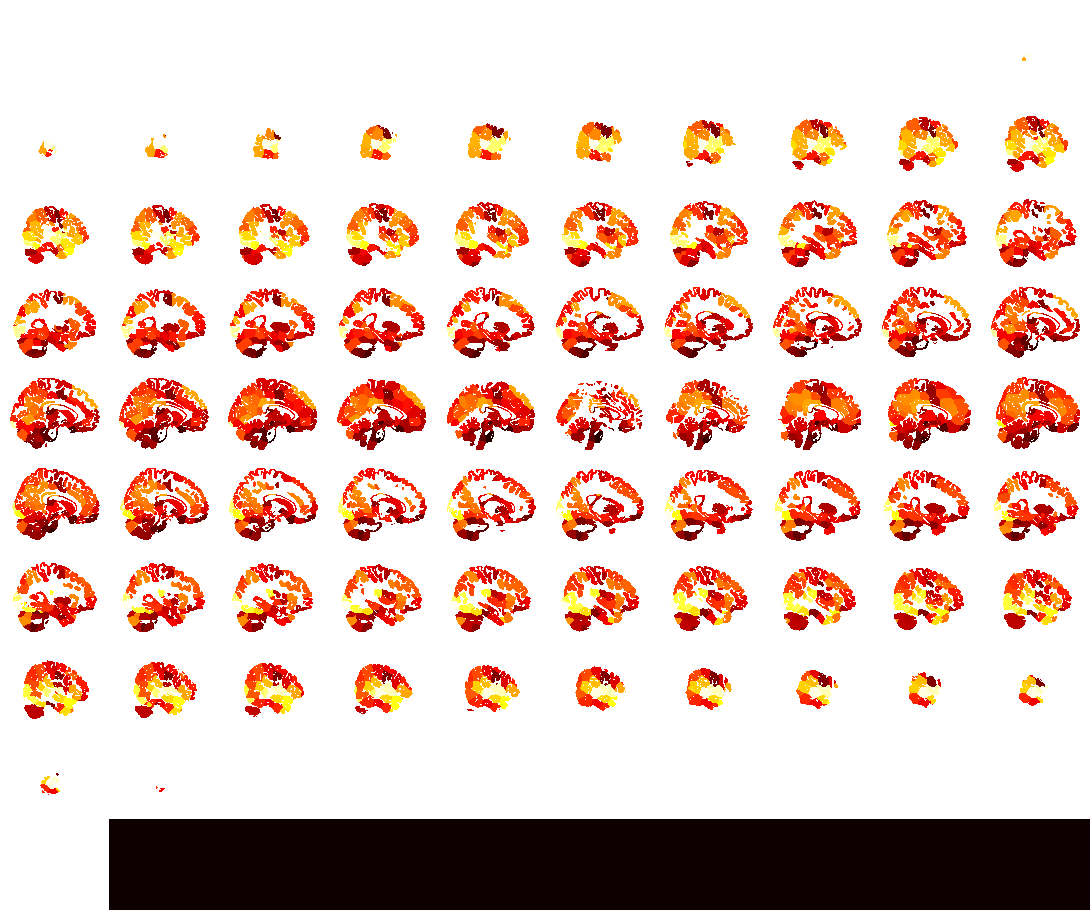

In [3]:
path = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-01.npy"
curr_data = np.load(path)
res = lpp_isc(curr_data, summary_statistic = np.mean)
curr_img = all293_masker_reopened.inverse_transform(res)
nilearn.plotting.view_img(nilearn.image.index_img(curr_img,0),
                         threshold = 0., )

#### Generalize ISC calculation to multiple runs and across all languages (english, french, chinese)

In [4]:
isc_english = np.zeros((293,9))
isc_french  = np.zeros((293,9))
isc_chinese = np.zeros((293,9))

for curr_run in range(9):
    
    # English
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-0" + str(curr_run+1) + ".npy")
    isc_english[:, curr_run] = lpp_isc(curr_data, 
                                       summary_statistic = np.mean,
                                       pairwise=True)
    
    # French
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-0" + str(curr_run+1) + ".npy")
    isc_french[:, curr_run] = lpp_isc(curr_data, 
                                      summary_statistic = np.mean,
                                      pairwise=True)
    
    # Chinese
    curr_data = np.load("../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppCN-run-0" + str(curr_run+1) + ".npy")
    isc_chinese[:, curr_run] = lpp_isc(curr_data, 
                                       summary_statistic = np.mean,
                                       pairwise=True)


Assuming 50 subjects with 282 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 309 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 283 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 298 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 326 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 322 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 340 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 354 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 322 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 303 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 315 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 307 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 265 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 293 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Assuming 27 subjects with 332 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 364 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 292 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 294 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 293 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 368 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 336 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 401 time points and 293 voxel(s) or ROI(s).


In [20]:
plt.subplot?

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


Text(0.5, 1.0, 'Chinese')

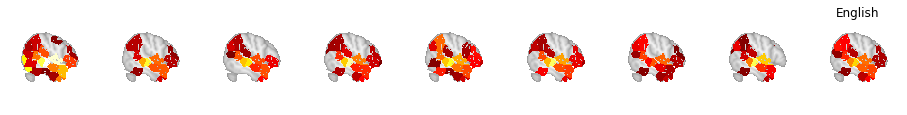

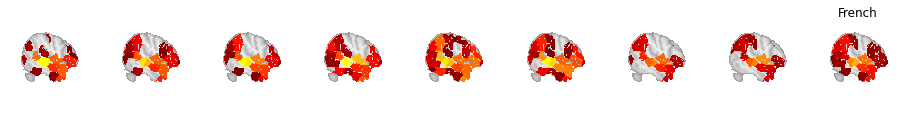

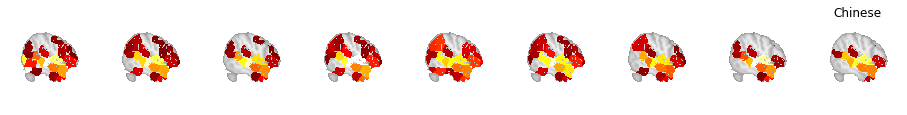

In [42]:
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_english[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('English')

###
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_french[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('French')


###
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_chinese[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('Chinese')



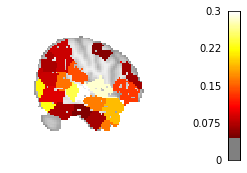

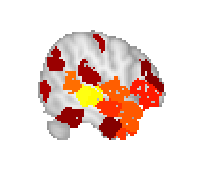

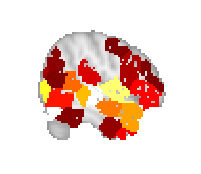

In [16]:
xslice = 55

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_english[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar=True, 
                        annotate = False,
                        display_mode="x",
                        cut_coords= [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                         );

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_french[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar= False, 
                        annotate = False,
                        display_mode="x",
                        cut_coords= [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                         );

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_chinese[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar= False, 
                        annotate = False,
                        display_mode="x",
                        cut_coords = [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                        #symmetric_cbar = False,
                         );

Assuming 33 subjects with 283 time points and 293 voxel(s) or ROI(s).



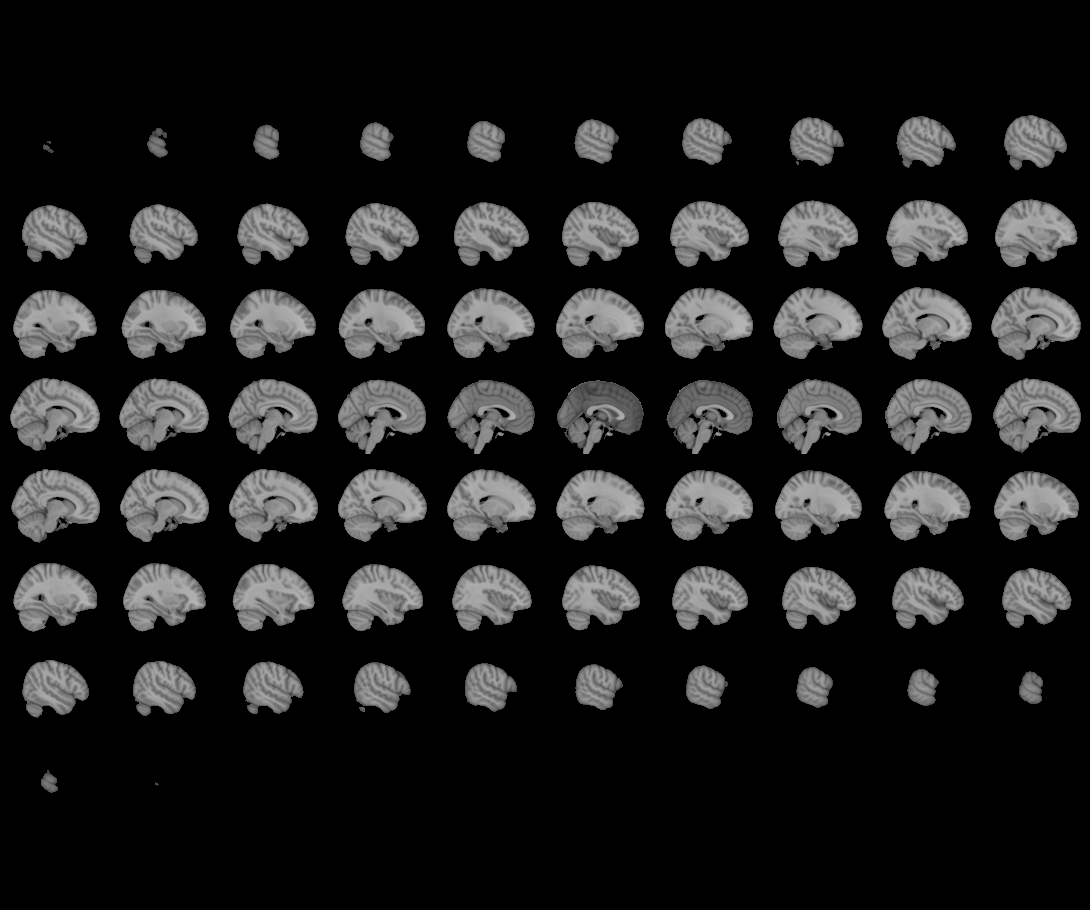
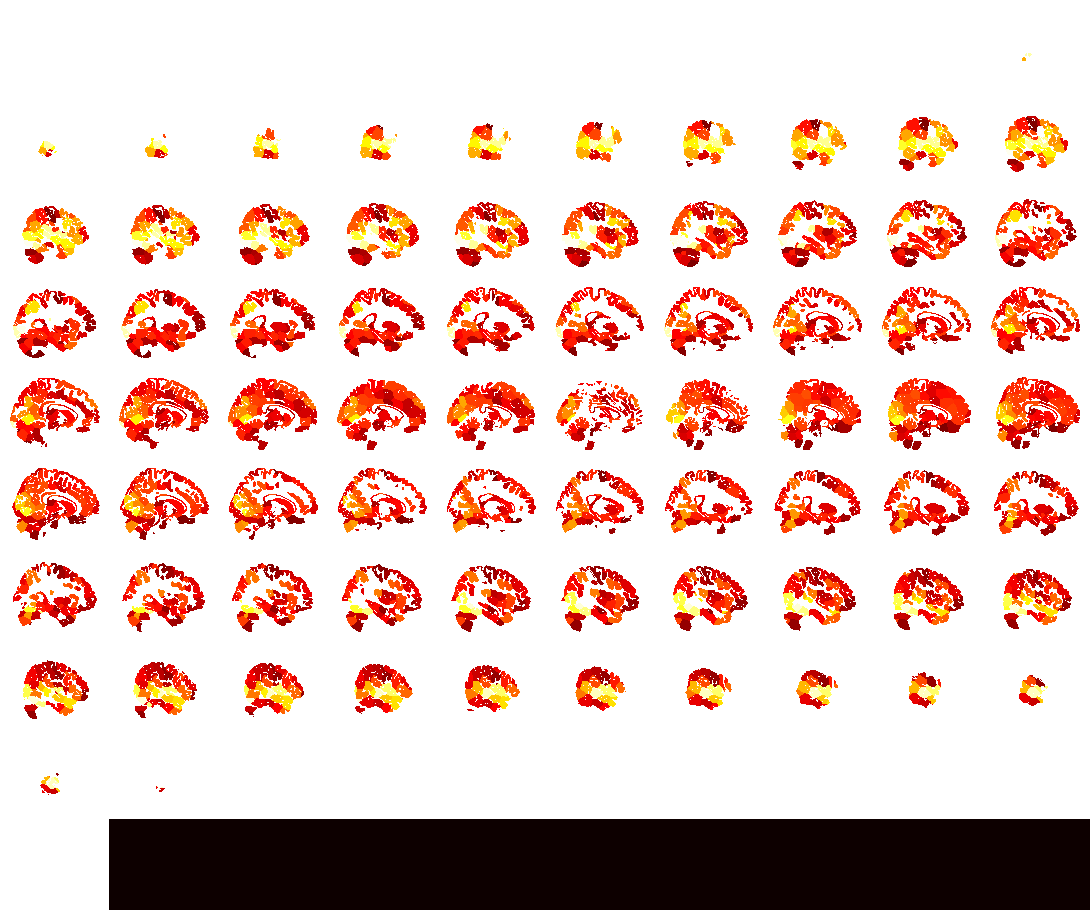

In [4]:
path = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppCN-run-01.npy"
curr_data = np.load(path)
res = lpp_isc(curr_data, summary_statistic = np.mean)
curr_img = all293_masker_reopened.inverse_transform(res)
nilearn.plotting.view_img(nilearn.image.index_img(curr_img,0),
                         threshold = 0.1, )

Assuming 27 subjects with 309 time points and 293 voxel(s) or ROI(s).



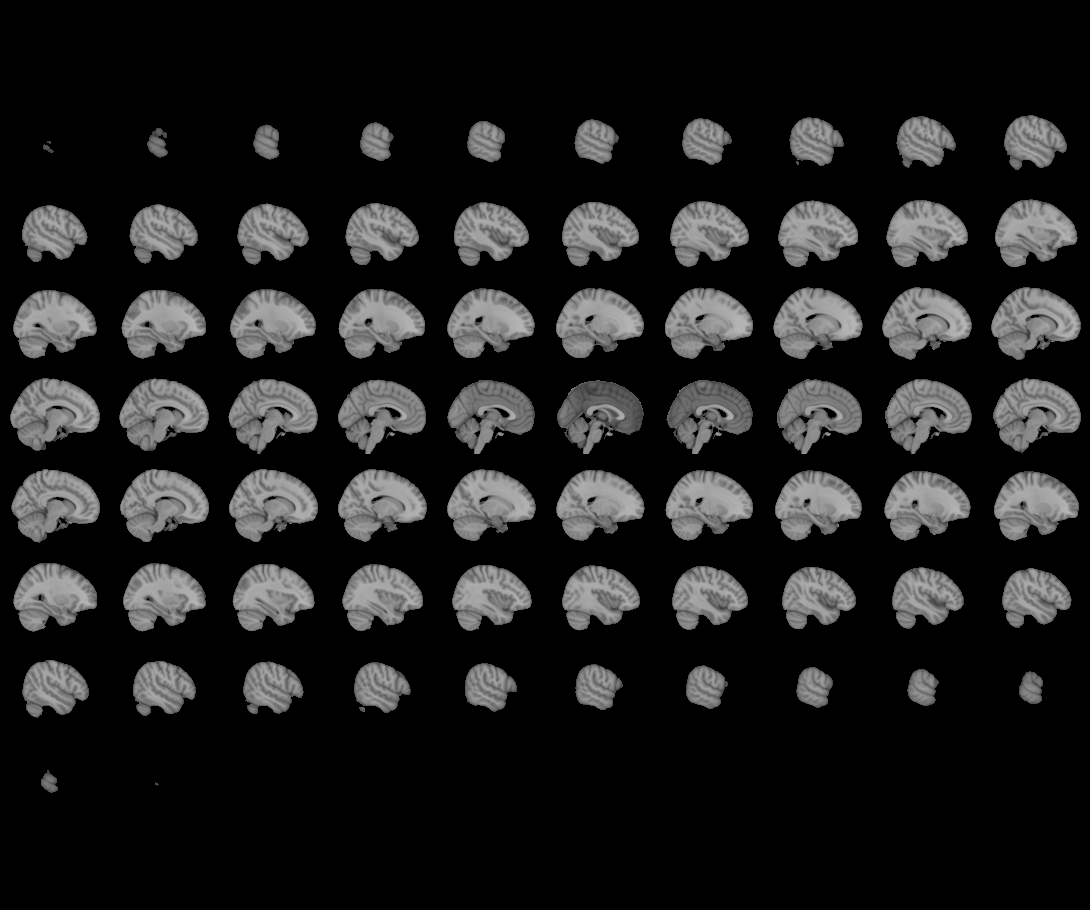
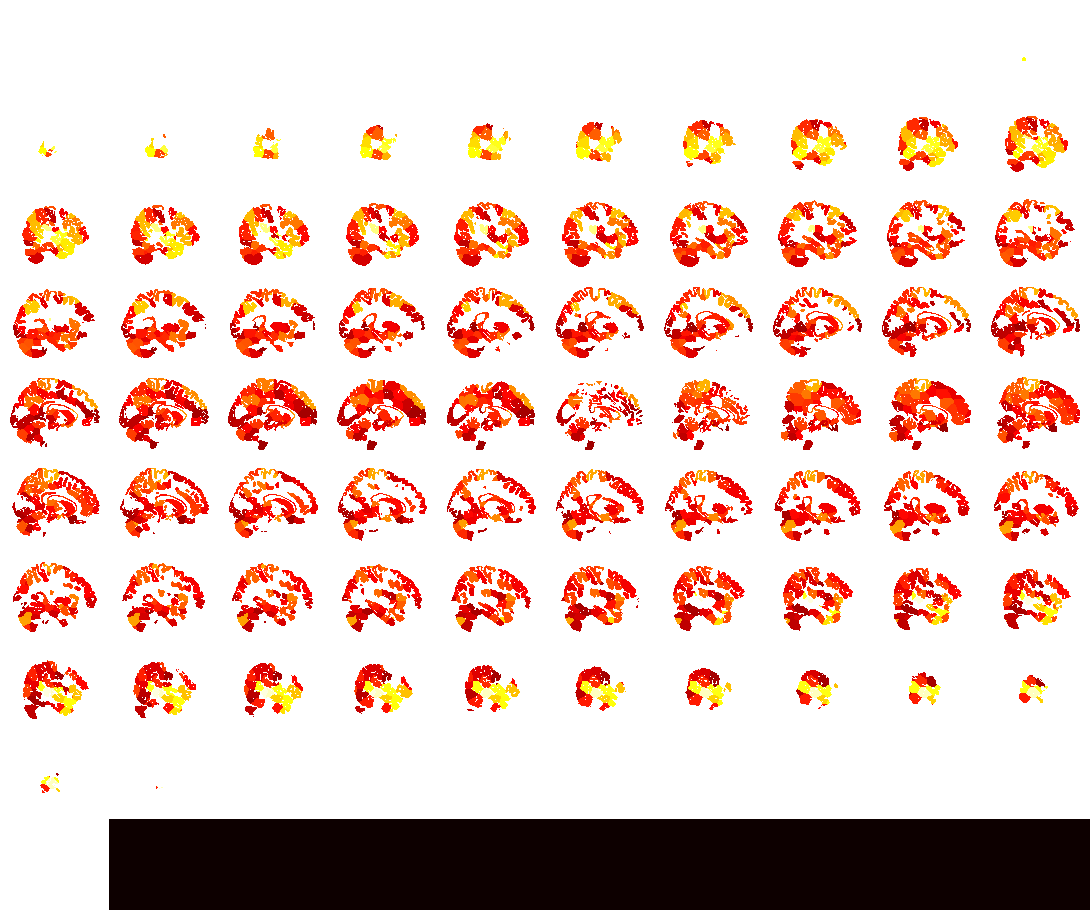

In [5]:
path = "../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-01.npy"
curr_data = np.load(path)
res = lpp_isc(curr_data, summary_statistic = np.mean)
curr_img = all293_masker_reopened.inverse_transform(res)
nilearn.plotting.view_img(nilearn.image.index_img(curr_img,0),
                         threshold = 0.1, )